In [1]:
import torch
import datasets, networks, sampling, completion, evaluation
import matplotlib.pyplot as plt
from torch import nn

In [2]:
#HYPERPARAMETERS
num_epochs = 15

# TODO Select a optimizer. [ 'adam', 'adamw', 'rmsprop' ]
optimizer_option = 'adamw'


# TODO Select a batch size.
batch_size = 16

# TODO Select a learning rate.
lr = 1e-3


num_residual = 15
num_kernels = 128

Files already downloaded and verified


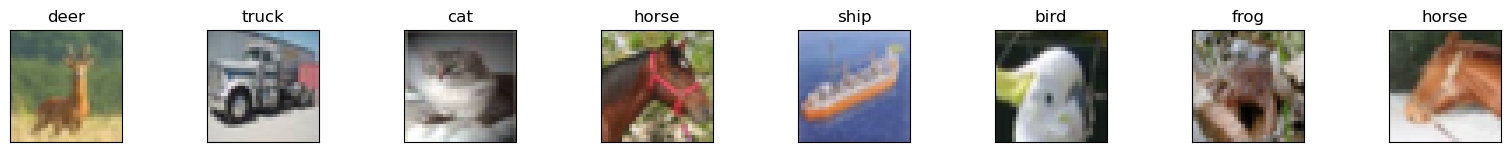

In [3]:
ds = datasets.Dataset('cifar10', batch_size=batch_size)
training_data = ds.get_train_data_loader()
test_data = ds.get_test_data_loader()

ds.visualize_dataset(training_data,8)

Using device: cuda:0
Epoch:   1/ 15, Batch     1, Loss: 5.6309
Epoch:   1/ 15, Batch   301, Loss: 4.4811
Epoch:   1/ 15, Batch   601, Loss: 4.2198
Epoch:   1/ 15, Batch   901, Loss: 4.1399
Epoch:   1/ 15, Batch  1201, Loss: 4.0751
Epoch:   1/ 15, Batch  1501, Loss: 3.9984
Epoch:   1/ 15, Batch  1801, Loss: 4.0085
Epoch:   1/ 15, Batch  2101, Loss: 3.9794
Epoch:   1/ 15, Batch  2401, Loss: 3.9173
Epoch:   1/ 15, Batch  2701, Loss: 3.8993
Epoch:   1/ 15, Batch  3001, Loss: 3.8834
-----------------------------------------
Epoch:   1 took 245.78s
Epoch:   1, Test Loss: 3.8022
-----------------------------------------


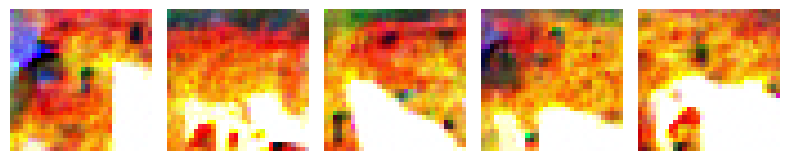

Epoch:   2/ 15, Batch     1, Loss: 3.8050
Epoch:   2/ 15, Batch   301, Loss: 3.8286
Epoch:   2/ 15, Batch   601, Loss: 3.8316
Epoch:   2/ 15, Batch   901, Loss: 3.8224
Epoch:   2/ 15, Batch  1201, Loss: 3.7957
Epoch:   2/ 15, Batch  1501, Loss: 3.7734
Epoch:   2/ 15, Batch  1801, Loss: 3.7362
Epoch:   2/ 15, Batch  2101, Loss: 3.7391
Epoch:   2/ 15, Batch  2401, Loss: 3.7268
Epoch:   2/ 15, Batch  2701, Loss: 3.7157
Epoch:   2/ 15, Batch  3001, Loss: 3.6826
-----------------------------------------
Epoch:   2 took 277.02s
Epoch:   2, Test Loss: 3.6457
-----------------------------------------


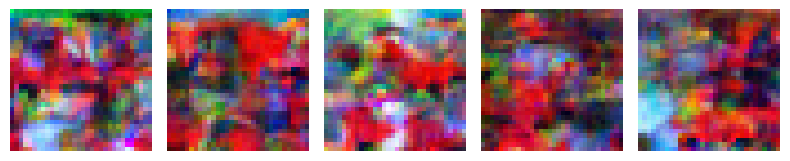

Epoch:   3/ 15, Batch     1, Loss: 4.0182
Epoch:   3/ 15, Batch   301, Loss: 3.6851
Epoch:   3/ 15, Batch   601, Loss: 3.6655
Epoch:   3/ 15, Batch   901, Loss: 3.6764
Epoch:   3/ 15, Batch  1201, Loss: 3.6672
Epoch:   3/ 15, Batch  1501, Loss: 3.6813
Epoch:   3/ 15, Batch  1801, Loss: 3.6383
Epoch:   3/ 15, Batch  2101, Loss: 3.6295
Epoch:   3/ 15, Batch  2401, Loss: 3.6520
Epoch:   3/ 15, Batch  2701, Loss: 3.6196
Epoch:   3/ 15, Batch  3001, Loss: 3.5907
-----------------------------------------
Epoch:   3 took 246.63s
Epoch:   3, Test Loss: 3.5651
-----------------------------------------


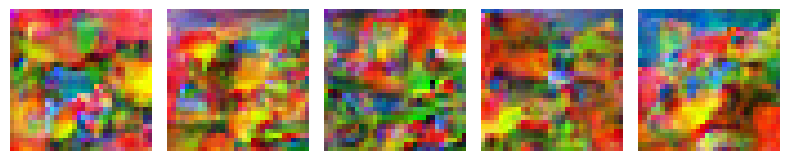

Epoch:   4/ 15, Batch     1, Loss: 3.6678
Epoch:   4/ 15, Batch   301, Loss: 3.6090
Epoch:   4/ 15, Batch   601, Loss: 3.5924
Epoch:   4/ 15, Batch   901, Loss: 3.5798
Epoch:   4/ 15, Batch  1201, Loss: 3.5949
Epoch:   4/ 15, Batch  1501, Loss: 3.5771
Epoch:   4/ 15, Batch  1801, Loss: 3.5664
Epoch:   4/ 15, Batch  2101, Loss: 3.5738
Epoch:   4/ 15, Batch  2401, Loss: 3.5653
Epoch:   4/ 15, Batch  2701, Loss: 3.5420
Epoch:   4/ 15, Batch  3001, Loss: 3.5475
-----------------------------------------
Epoch:   4 took 274.89s
Epoch:   4, Test Loss: 3.5080
-----------------------------------------


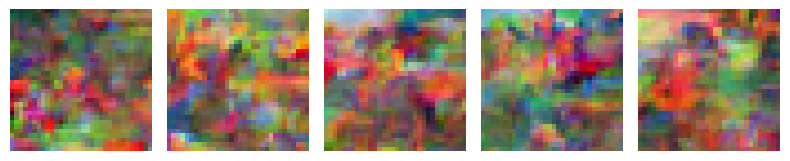

Epoch:   5/ 15, Batch     1, Loss: 3.4579
Epoch:   5/ 15, Batch   301, Loss: 3.5383
Epoch:   5/ 15, Batch   601, Loss: 3.5530
Epoch:   5/ 15, Batch   901, Loss: 3.5282
Epoch:   5/ 15, Batch  1201, Loss: 3.5344
Epoch:   5/ 15, Batch  1501, Loss: 3.5439
Epoch:   5/ 15, Batch  1801, Loss: 3.5012
Epoch:   5/ 15, Batch  2101, Loss: 3.5122
Epoch:   5/ 15, Batch  2401, Loss: 3.5109
Epoch:   5/ 15, Batch  2701, Loss: 3.5104
Epoch:   5/ 15, Batch  3001, Loss: 3.5126
-----------------------------------------
Epoch:   5 took 273.81s
Epoch:   5, Test Loss: 3.4972
-----------------------------------------


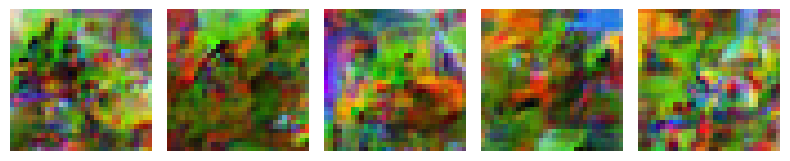

Epoch:   6/ 15, Batch     1, Loss: 3.3769
Epoch:   6/ 15, Batch   301, Loss: 3.5156
Epoch:   6/ 15, Batch   601, Loss: 3.5140
Epoch:   6/ 15, Batch   901, Loss: 3.5182
Epoch:   6/ 15, Batch  1201, Loss: 3.4878
Epoch:   6/ 15, Batch  1501, Loss: 3.4949
Epoch:   6/ 15, Batch  1801, Loss: 3.4879
Epoch:   6/ 15, Batch  2101, Loss: 3.4916
Epoch:   6/ 15, Batch  2401, Loss: 3.4948
Epoch:   6/ 15, Batch  2701, Loss: 3.4786
Epoch:   6/ 15, Batch  3001, Loss: 3.4885
-----------------------------------------
Epoch:   6 took 238.20s
Epoch:   6, Test Loss: 3.4553
-----------------------------------------


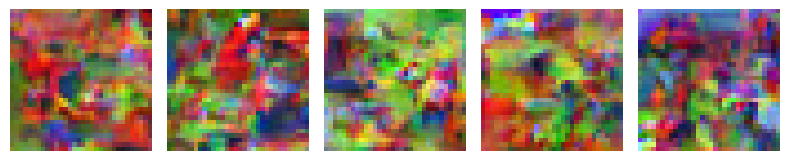

Epoch:   7/ 15, Batch     1, Loss: 3.3269
Epoch:   7/ 15, Batch   301, Loss: 3.4863
Epoch:   7/ 15, Batch   601, Loss: 3.4794
Epoch:   7/ 15, Batch   901, Loss: 3.4754
Epoch:   7/ 15, Batch  1201, Loss: 3.4632
Epoch:   7/ 15, Batch  1501, Loss: 3.4599
Epoch:   7/ 15, Batch  1801, Loss: 3.4791
Epoch:   7/ 15, Batch  2101, Loss: 3.4879
Epoch:   7/ 15, Batch  2401, Loss: 3.5150
Epoch:   7/ 15, Batch  2701, Loss: 3.4715
Epoch:   7/ 15, Batch  3001, Loss: 3.4544
-----------------------------------------
Epoch:   7 took 256.91s
Epoch:   7, Test Loss: 3.4528
-----------------------------------------


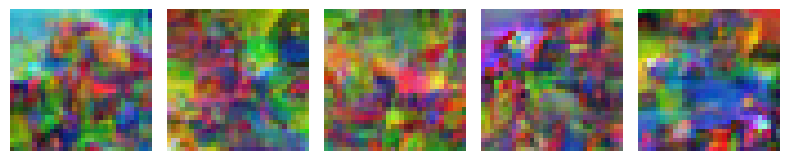

Epoch:   8/ 15, Batch     1, Loss: 3.3565
Epoch:   8/ 15, Batch   301, Loss: 3.4390
Epoch:   8/ 15, Batch   601, Loss: 3.4596
Epoch:   8/ 15, Batch   901, Loss: 3.4558
Epoch:   8/ 15, Batch  1201, Loss: 3.4386
Epoch:   8/ 15, Batch  1501, Loss: 3.4404
Epoch:   8/ 15, Batch  1801, Loss: 3.4389
Epoch:   8/ 15, Batch  2101, Loss: 3.4541
Epoch:   8/ 15, Batch  2401, Loss: 3.4415
Epoch:   8/ 15, Batch  2701, Loss: 3.4536
Epoch:   8/ 15, Batch  3001, Loss: 3.4460
-----------------------------------------
Epoch:   8 took 269.54s
Epoch:   8, Test Loss: 3.4271
-----------------------------------------


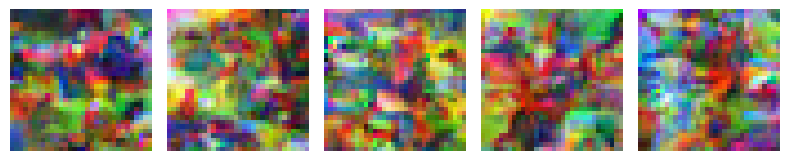

Epoch:   9/ 15, Batch     1, Loss: 3.4722
Epoch:   9/ 15, Batch   301, Loss: 3.4205
Epoch:   9/ 15, Batch   601, Loss: 3.4446
Epoch:   9/ 15, Batch   901, Loss: 3.4215
Epoch:   9/ 15, Batch  1201, Loss: 3.4403
Epoch:   9/ 15, Batch  1501, Loss: 3.4416
Epoch:   9/ 15, Batch  1801, Loss: 3.4313
Epoch:   9/ 15, Batch  2101, Loss: 3.4378
Epoch:   9/ 15, Batch  2401, Loss: 3.4308
Epoch:   9/ 15, Batch  2701, Loss: 3.4323
Epoch:   9/ 15, Batch  3001, Loss: 3.4336
-----------------------------------------
Epoch:   9 took 261.08s
Epoch:   9, Test Loss: 3.3947
-----------------------------------------


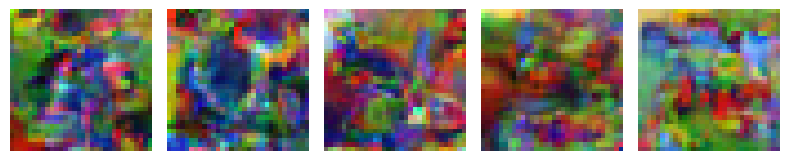

Epoch:  10/ 15, Batch     1, Loss: 3.1501
Epoch:  10/ 15, Batch   301, Loss: 3.4180
Epoch:  10/ 15, Batch   601, Loss: 3.4199
Epoch:  10/ 15, Batch   901, Loss: 3.4331
Epoch:  10/ 15, Batch  1201, Loss: 3.4158
Epoch:  10/ 15, Batch  1501, Loss: 3.4359
Epoch:  10/ 15, Batch  1801, Loss: 3.4238
Epoch:  10/ 15, Batch  2101, Loss: 3.4194
Epoch:  10/ 15, Batch  2401, Loss: 3.4117
Epoch:  10/ 15, Batch  2701, Loss: 3.4015
Epoch:  10/ 15, Batch  3001, Loss: 3.4123
-----------------------------------------
Epoch:  10 took 236.82s
Epoch:  10, Test Loss: 3.3847
-----------------------------------------


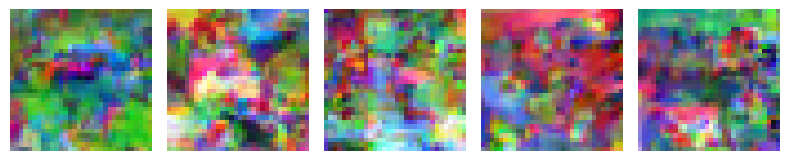

Epoch:  11/ 15, Batch     1, Loss: 3.3539
Epoch:  11/ 15, Batch   301, Loss: 3.4092
Epoch:  11/ 15, Batch   601, Loss: 3.4162
Epoch:  11/ 15, Batch   901, Loss: 3.4257
Epoch:  11/ 15, Batch  1201, Loss: 3.3985
Epoch:  11/ 15, Batch  1501, Loss: 3.4120
Epoch:  11/ 15, Batch  1801, Loss: 3.4066
Epoch:  11/ 15, Batch  2101, Loss: 3.4135
Epoch:  11/ 15, Batch  2401, Loss: 3.4297
Epoch:  11/ 15, Batch  2701, Loss: 3.4272
Epoch:  11/ 15, Batch  3001, Loss: 3.4091
-----------------------------------------
Epoch:  11 took 236.76s
Epoch:  11, Test Loss: 3.3849
-----------------------------------------


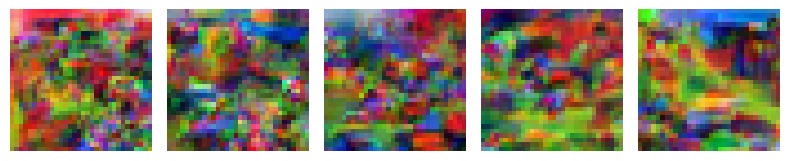

Epoch:  12/ 15, Batch     1, Loss: 3.6511
Epoch:  12/ 15, Batch   301, Loss: 3.3895
Epoch:  12/ 15, Batch   601, Loss: 3.4078
Epoch:  12/ 15, Batch   901, Loss: 3.3963
Epoch:  12/ 15, Batch  1201, Loss: 3.3976
Epoch:  12/ 15, Batch  1501, Loss: 3.3953
Epoch:  12/ 15, Batch  1801, Loss: 3.3903
Epoch:  12/ 15, Batch  2101, Loss: 3.3851
Epoch:  12/ 15, Batch  2401, Loss: 3.3943
Epoch:  12/ 15, Batch  2701, Loss: 3.4161
Epoch:  12/ 15, Batch  3001, Loss: 3.3900
-----------------------------------------
Epoch:  12 took 238.18s
Epoch:  12, Test Loss: 3.4034
-----------------------------------------


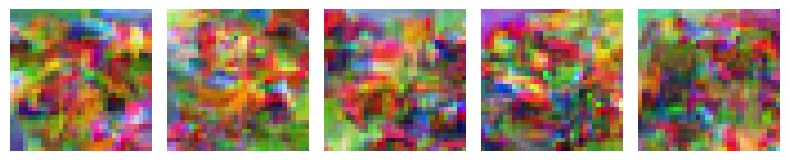

Epoch:  13/ 15, Batch     1, Loss: 3.4199
Epoch:  13/ 15, Batch   301, Loss: 3.3770
Epoch:  13/ 15, Batch   601, Loss: 3.3932
Epoch:  13/ 15, Batch   901, Loss: 3.3902
Epoch:  13/ 15, Batch  1201, Loss: 3.3940
Epoch:  13/ 15, Batch  1501, Loss: 3.3876
Epoch:  13/ 15, Batch  1801, Loss: 3.3868
Epoch:  13/ 15, Batch  2101, Loss: 3.3783
Epoch:  13/ 15, Batch  2401, Loss: 3.3928
Epoch:  13/ 15, Batch  2701, Loss: 3.3928
Epoch:  13/ 15, Batch  3001, Loss: 3.3972
-----------------------------------------
Epoch:  13 took 233.18s
Epoch:  13, Test Loss: 3.4460
-----------------------------------------


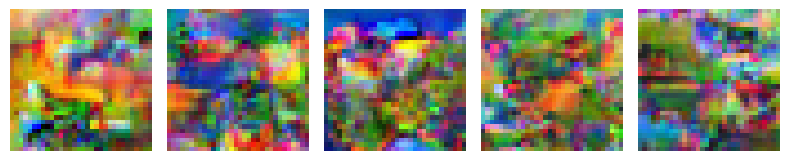

Epoch:  14/ 15, Batch     1, Loss: 3.4198
Epoch:  14/ 15, Batch   301, Loss: 3.4006
Epoch:  14/ 15, Batch   601, Loss: 3.3872
Epoch:  14/ 15, Batch   901, Loss: 3.3843
Epoch:  14/ 15, Batch  1201, Loss: 3.3889
Epoch:  14/ 15, Batch  1501, Loss: 3.3695
Epoch:  14/ 15, Batch  1801, Loss: 3.3921
Epoch:  14/ 15, Batch  2101, Loss: 3.3761
Epoch:  14/ 15, Batch  2401, Loss: 3.3920
Epoch:  14/ 15, Batch  2701, Loss: 3.3772
Epoch:  14/ 15, Batch  3001, Loss: 3.3723
-----------------------------------------
Epoch:  14 took 248.84s
Epoch:  14, Test Loss: 3.3757
-----------------------------------------


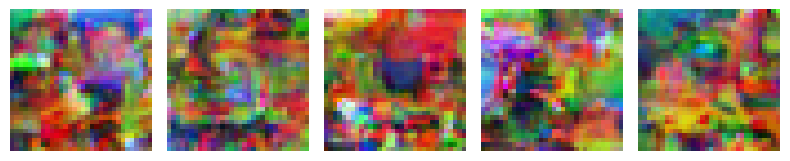

Epoch:  15/ 15, Batch     1, Loss: 3.4057
Epoch:  15/ 15, Batch   301, Loss: 3.3729
Epoch:  15/ 15, Batch   601, Loss: 3.3787
Epoch:  15/ 15, Batch   901, Loss: 3.3864
Epoch:  15/ 15, Batch  1201, Loss: 3.3591
Epoch:  15/ 15, Batch  1501, Loss: 3.3698
Epoch:  15/ 15, Batch  1801, Loss: 3.3608
Epoch:  15/ 15, Batch  2101, Loss: 3.3716
Epoch:  15/ 15, Batch  2401, Loss: 3.3879
Epoch:  15/ 15, Batch  2701, Loss: 3.3578
Epoch:  15/ 15, Batch  3001, Loss: 3.3856
-----------------------------------------
Epoch:  15 took 263.86s
Epoch:  15, Test Loss: 3.4178
-----------------------------------------


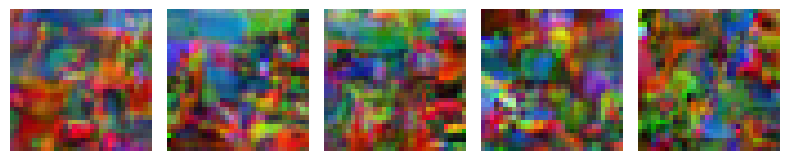

Training took 4578.46s


In [4]:
# Training
import time
from torch.optim import Adam, AdamW, RMSprop, SGD 
from torch.optim.lr_scheduler import ExponentialLR

PixelCNN = networks.PixelCNN(num_kernels=num_kernels, num_residual=num_residual)

device = torch.device('cuda:0')
print(f'Using device: {device}')
print('=========================================')

PixelCNN.to(device)

learning_rates = []
train_loss_curve = []
test_loss_curve = []
train_loss_epochs = []
test_loss_epochs = []
optimizer = None

# Select optimizer
if optimizer_option == "adam":
  optimizer = torch.optim.Adam(PixelCNN.parameters(), lr)
  
elif optimizer_option == "adamw":
  optimizer = torch.optim.AdamW(PixelCNN.parameters(), lr)
  
elif optimizer_option == "rmsprop":
  optimizer = torch.optim.RMSprop(PixelCNN.parameters(), lr)
  
else:
  optimizer = torch.optim.SGD(PixelCNN.parameters(), lr, momentum=0.9)  


scheduler = scheduler = ExponentialLR(optimizer, gamma=0.999977)


overall_start_time = time.time()

# training loop
for epoch in range(num_epochs):

  epoch_start_time = time.time()
  # Switch to training mode.
  PixelCNN.train()

  losses = []
  batch_idx = 0

  for images, labels in training_data:

    images = images.to(device)
    output = PixelCNN(images)

    images = images.view(-1)
    images = images*255
  
    output = torch.reshape(output, (batch_size, 256, 3, 32, 32))
    output = output.permute(0,2,3,4,1).contiguous().view(-1, 256)

    loss = nn.functional.cross_entropy(output, images.long())
    loss.backward()
    torch.nn.utils.clip_grad_norm_(PixelCNN.parameters(), 1)
  
    optimizer.step()
    for param_group in optimizer.param_groups:
      learning_rates.append(param_group['lr'])
    optimizer.zero_grad()


    losses.append(loss.detach().clone())

    if batch_idx % 300 == 0:
      average_loss = torch.stack(losses).mean().item()
      train_loss_curve.append(average_loss)
      train_loss_epochs.append(epoch + 1)
      losses = []
      print(f'Epoch: {epoch + 1:3d}/{num_epochs:3d}, Batch {batch_idx + 1:5d}, Loss: {average_loss:.4f}')
    batch_idx += 1

  scheduler.step()
  epoch_end_time = time.time()
  print('-----------------------------------------')
  print(f'Epoch: {epoch + 1:3d} took {epoch_end_time - epoch_start_time:.2f}s')
  test_loss = evaluation.evaluate(model=PixelCNN, test_data_loader=test_data, device=device, batch_size=batch_size)
  test_loss_curve.append(test_loss)
  test_loss_epochs.append(epoch + 1)
  print(f'Epoch: {epoch + 1:3d}, Test Loss: {test_loss:.4f}')
  print('-----------------------------------------')
  

  samples = sampling.sample(PixelCNN, num_samples=5)
  sampling.save_samples(samples)
  

overall_end_time = time.time()
print('=========================================')
print(f'Training took {overall_end_time - overall_start_time:.2f}s')



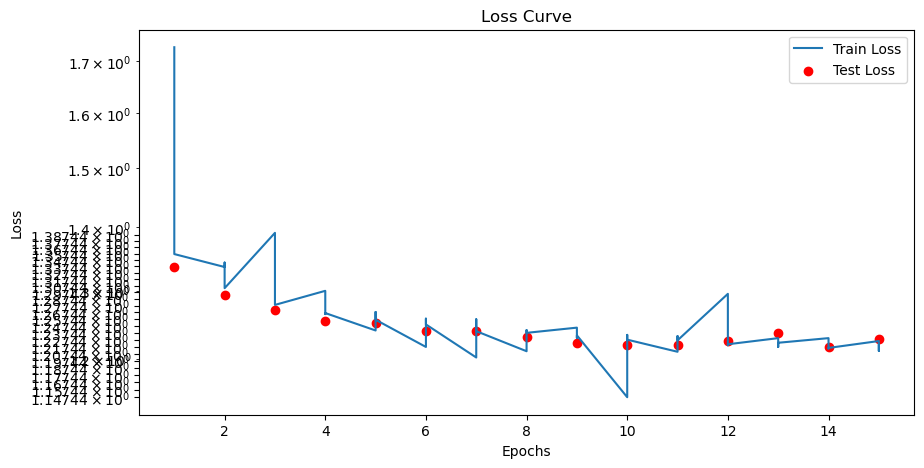

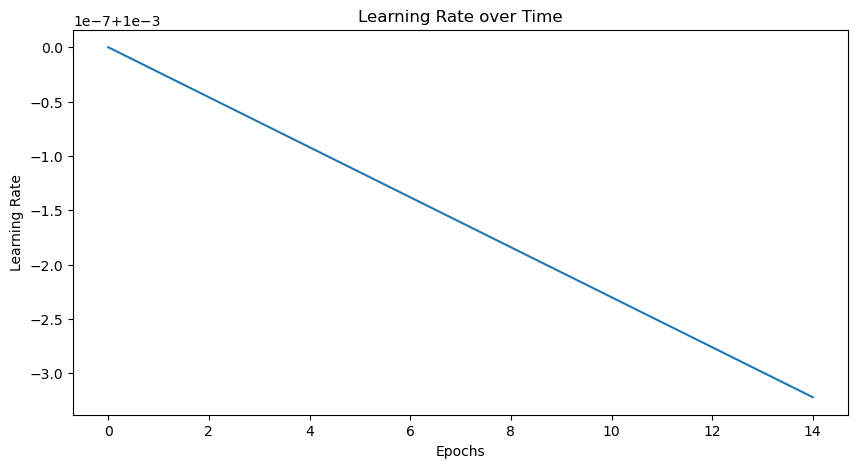

In [5]:
import numpy as np
# Loss Curve Plot
plt.figure(figsize=(10, 5))
plt.plot(train_loss_epochs, np.log(train_loss_curve), label='Train Loss')
plt.scatter(test_loss_epochs, np.log(test_loss_curve), color='red', label='Test Loss')
plt.yscale("log")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.yticks(np.arange(min(np.log(train_loss_curve)), max(np.log(train_loss_curve)[5:]), 0.01))


plt.show()

# Learning Rate Plot
num_batches = len(training_data)
learning_rates_res = [sum(learning_rates[i * num_batches:(i + 1) * num_batches]) / num_batches for i in range(num_epochs)]
plt.figure(figsize=(10, 5))
plt.plot(range(num_epochs), learning_rates_res)
plt.xlabel('Epochs')
plt.ylabel('Learning Rate')
plt.title('Learning Rate over Time')
plt.show()

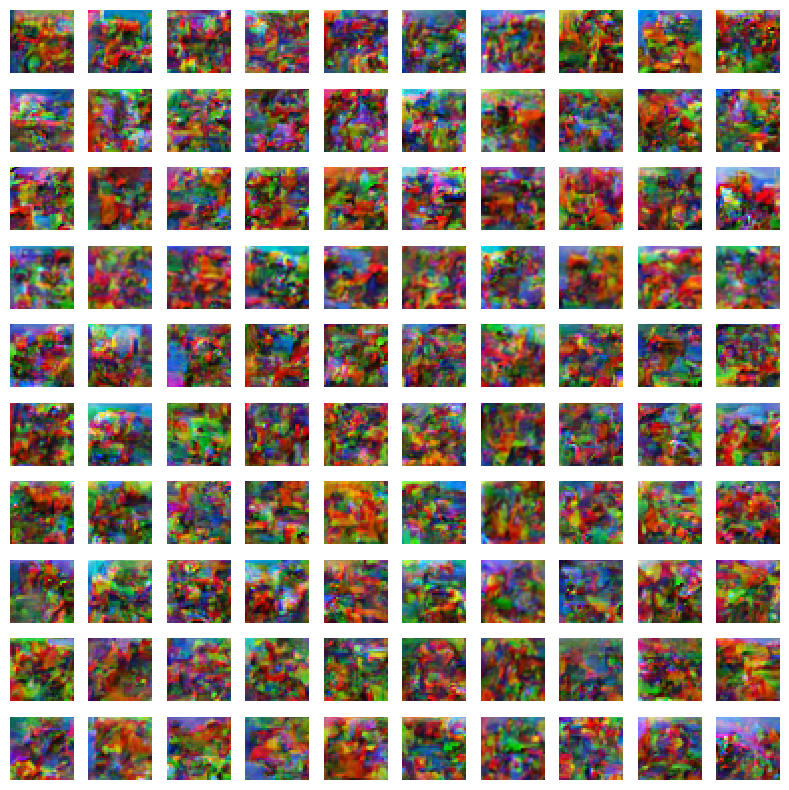

In [6]:
samples = sampling.sample(PixelCNN, num_samples=100)
sampling.save_samples(samples, filename="Cifar10")

In [7]:
torch.save(PixelCNN.state_dict(), 'PixelCNN_cifar10.pth')

In [8]:
PixelCNN = networks.PixelCNN(num_kernels=num_kernels, num_residual=num_residual)
PixelCNN.to(torch.device("cuda"))
PixelCNN.load_state_dict(torch.load("PixelCNN_cifar10.pth"))

<All keys matched successfully>

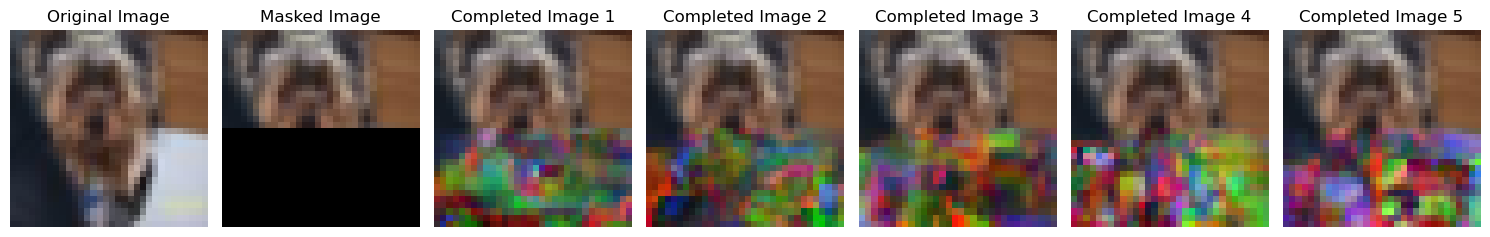

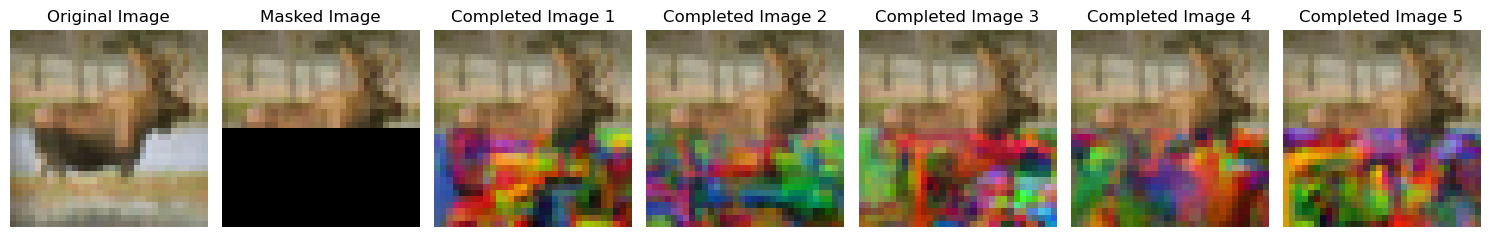

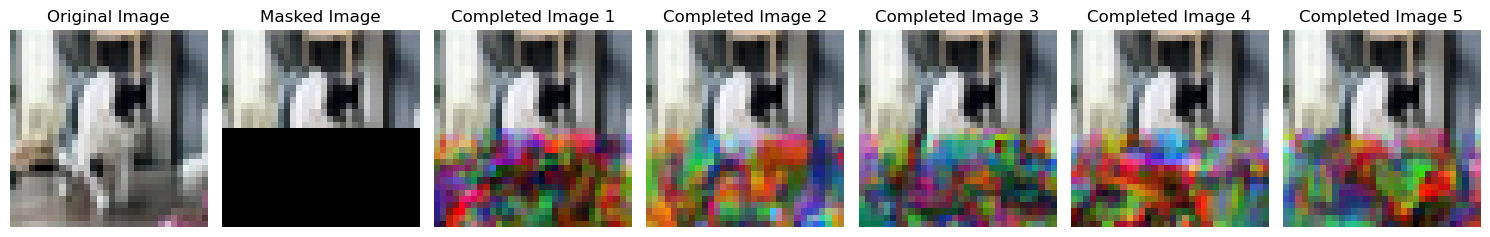

In [9]:
for i in range(3):
    original_img = completion.get_random_image(ds)
    masked_img, mask = completion.mask_image(original_img)
    completed_img = completion.complete(PixelCNN, masked_img, mask)
    completion.plot_completed_images(original_img, masked_img, completed_img)


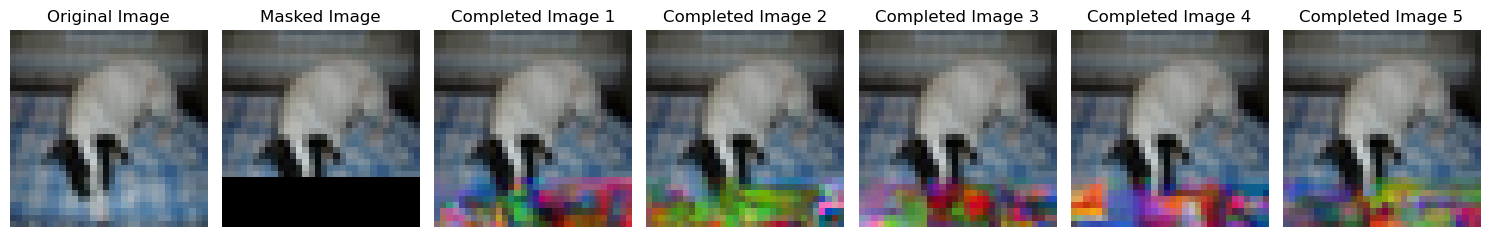

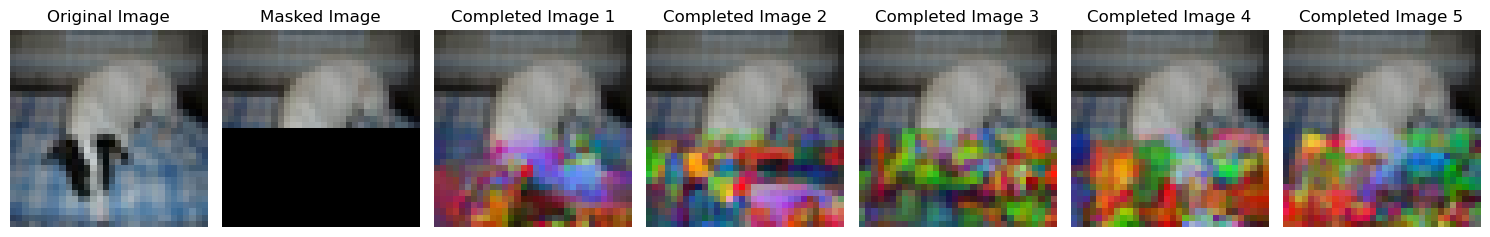

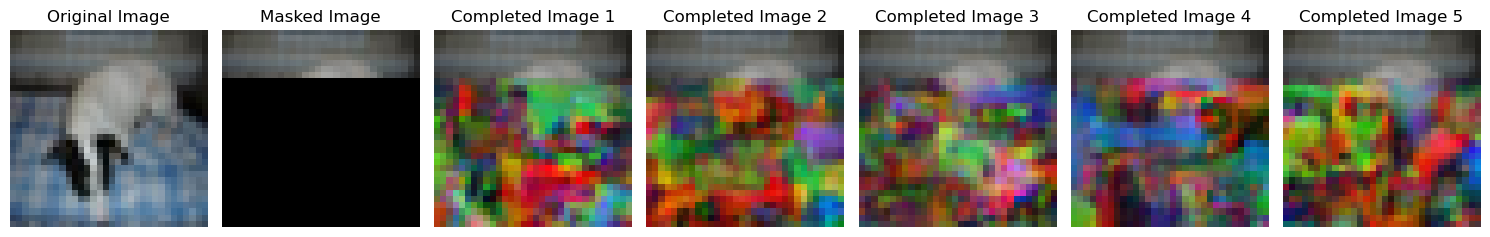

In [10]:
original_img = completion.get_random_image(ds)
for i in range(3):
    masked_img, mask = completion.mask_image(original_img, mask_fraction=0.25*(i+1))
    completed_img = completion.complete(PixelCNN, masked_img, mask)
    completion.plot_completed_images(original_img, masked_img, completed_img)